In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv('Social_Network_Ads.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [3]:
df.drop(columns='User ID',inplace=True)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Gender           400 non-null    object
 1   Age              400 non-null    int64 
 2   EstimatedSalary  400 non-null    int64 
 3   Purchased        400 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 12.6+ KB


In [5]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df['Gender']=encoder.fit_transform(df['Gender'])

In [6]:
df['Gender'].unique()

array([1, 0])

In [7]:
#Creating the independent and the dependent feature
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [8]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [9]:
print(x_train.shape)
print(x_test.shape)

(320, 3)
(80, 3)


In [10]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train_scale=scaler.fit_transform(x_train)
x_test_scale=scaler.transform(x_test)

In [11]:
#!st method
np.sqrt(x_train.shape[0])

17.88854381999832

In [12]:
k=17

In [13]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=17)

In [14]:
knn.fit(x_train_scale,y_train)

KNeighborsClassifier(n_neighbors=17)

In [15]:
y_pred=knn.predict(x_test_scale)

In [16]:
from sklearn.metrics import accuracy_score,precision_score
print("Accuracy score:",accuracy_score(y_test,y_pred))
print("Precision score:",precision_score(y_test,y_pred))

Accuracy score: 0.95
Precision score: 0.875


In [17]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred))

[[55  3]
 [ 1 21]]


In [18]:
#Effect of k on training error rate and the validation error rate
error_train=[]
error_test=[]
for i in range(1,26):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train_scale,y_train)
    #y_pred1=knn.predict(x_test_scale)
    x=confusion_matrix(y_train,knn.predict(x_train_scale))
    y=confusion_matrix(y_test,knn.predict(x_test_scale))
    error_train.append((x[0][1]+x[1][0])/x.sum())
    error_test.append((y[0][1]+y[1][0])/y.sum())

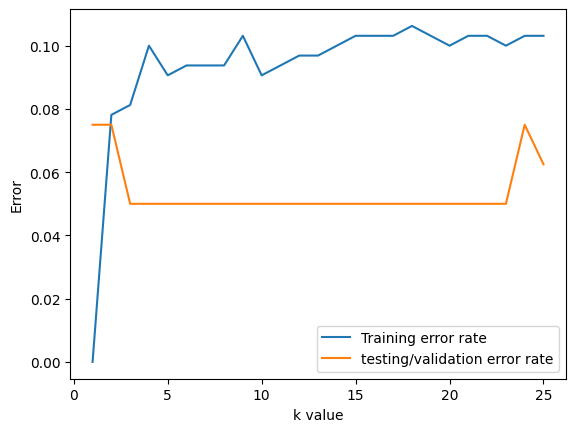

In [19]:
plt.plot(range(1,26),error_train,label='Training error rate')
plt.plot(range(1,26),error_test,label='testing/validation error rate')
plt.xlabel("k value")
plt.ylabel("Error")
plt.legend()
plt.show()

In [20]:
knn=KNeighborsClassifier(n_neighbors=11)
knn.fit(x_train_scale,y_train)

KNeighborsClassifier(n_neighbors=11)

In [21]:
y_pred=knn.predict(x_test_scale)

In [22]:
accuracy_score(y_test,y_pred)

0.95

In [23]:
def predict_output():
    age=int(input("Enter your age"))
    salary=int(input("Enter your salary"))
    gender=int(input("Enter your gender"))
    x_new=np.array([[age],[salary],[gender]]).reshape(1,3)
    x_new=scaler.transform(x_new)
    if knn.predict(x_new)[0]==0:
        return "Will not purchase"
    else:
        return 'Will purchase'

In [24]:
#preedic_output()

In [25]:
#Step 2 creating the meshgrid
a=np.arange(start=x_train[:,0].min()-1,stop=x_train[:,0].max()+1,step=0.01)
b=np.arange(start=x_train[:,1].min()-1,stop=x_train[:,1].max()+1,step=0.01)
xx,yy=np.meshgrid(a,b)

InvalidIndexError: (slice(None, None, None), 0)